In [27]:
import fsspec
from pathlib import Path
import os
import glob
from scipy.io import wavfile
import numpy as np
import shutil
import pandas as pd
pd.options.plotting.backend = "plotly"

In [28]:
%%time
# Clone the GitHub repo
print('cloning GitHub repo --- this may take a long time')
shutil.rmtree('good-vibrations', ignore_errors=True)   
os.system('git clone http://github.com/aubreymoore/good-vibrations.git')

cloning GitHub repo --- this may take a long time
CPU times: user 2.43 ms, sys: 115 ms, total: 117 ms
Wall time: 1min 8s


0

In [29]:
# Get a list of wavpaths
wavpathlist = sorted(glob.glob('good-vibrations/data/gpepp/2022*.wav'))
len(wavpathlist)

308

In [30]:
df_actions = pd.read_csv('good-vibrations/data/gpepp/actions.csv')
df_actions

,timestamp,from_hole,to_hole
0,2022-05-23T12:01,0,1
1,2022-05-23T12:42,1,5
2,2022-05-24T00:00,5,1
3,2022-05-25T00:00,1,2


In [31]:
def maa(wavpath):
    '''Calculate mean absolute amplitude'''
    _, data = wavfile.read(wavpath)
    return np.mean(np.abs(data))

# maa(wavlist[10])

In [32]:
def get_timestamp(wavpath):
    '''Extract the timestamp from a wavpath'''
    return wavpath.split('/')[-1].split('.')[0]

In [36]:
%%time
# Build a pandas dataframe
mylist = []
for i, wavpath in enumerate(wavpathlist):
    mylist.append({'timestamp': get_timestamp(wavpath), 'maa': maa(wavpath)})        
df = pd.DataFrame(mylist)

df['hole_number'] = '0'
for i, r in df_actions.iterrows():
    df.loc[df['timestamp']>r.timestamp, 'hole_number'] = r.to_hole

df

CPU times: user 137 ms, sys: 23.6 ms, total: 160 ms
Wall time: 159 ms


,timestamp,maa,hole_number
0,2022-05-23T12:01:39,2331.508646,1
1,2022-05-23T12:11:51,159.958627,1
2,2022-05-23T12:21:58,900.848956,1
3,2022-05-23T12:32:04,86.770650,1
4,2022-05-23T12:42:11,1420.963217,5
...,...,...,...
303,2022-05-25T15:25:01,79.411185,2
304,2022-05-25T15:35:07,83.746902,2
305,2022-05-25T15:45:14,81.033388,2
306,2022-05-25T15:55:21,81.703862,2


In [37]:
# Remove the first recording because it contains unwanted background noise from human voices etc.
# df.drop(index=0, inplace=True)

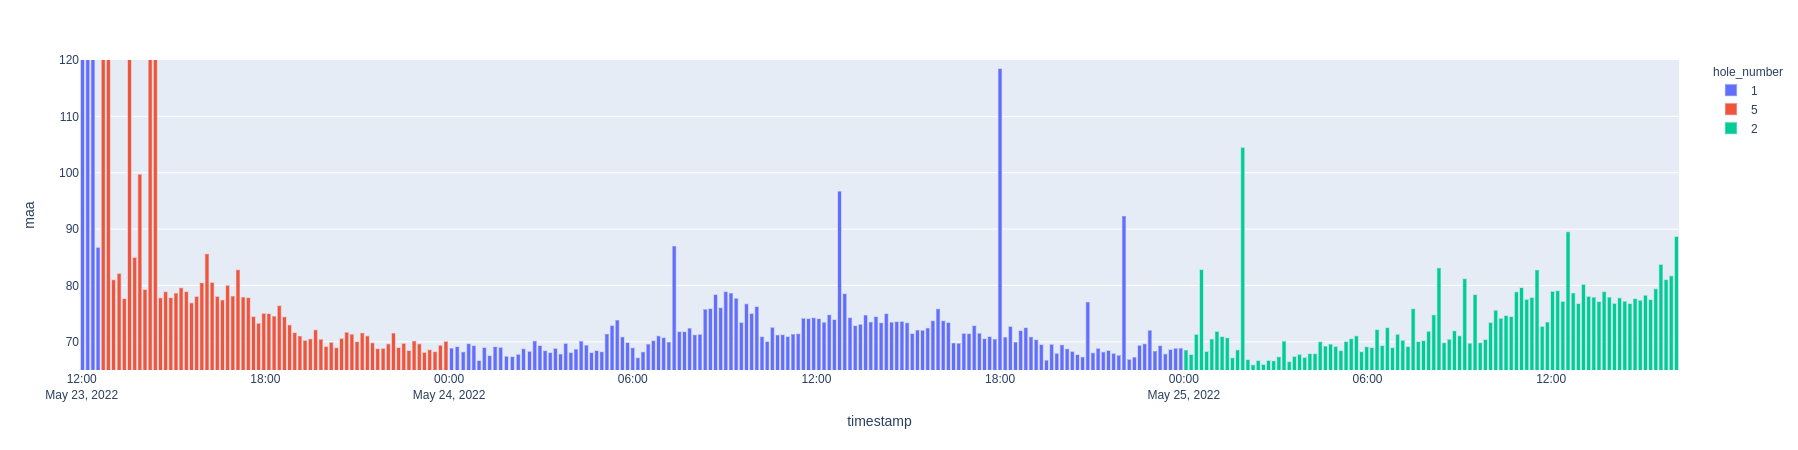

In [38]:
# plot maa vs timestamp
fig1 = df.plot.bar(x='timestamp', y='maa', color='hole_number')
fig1.update_layout(yaxis_range=[65, 120])
# fig1.add_hline(y=df.iloc[0].maa) # add a horizontal line at the value of maa for the recording prior to introduction of the grub

# for timestamp in ['2022-05-24T00:00', '2022-05-25T00:00']:
#     fig1.add_vline(x=timestamp, line_color='red')

fig1.show()

In [9]:
# Garbage collection: Delete local repo
shutil.rmtree('good-vibrations', ignore_errors=True)   